In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import sklearn as skl

In [2]:
df_2022=pd.read_excel(Path("../Resources/ttc-delay-data-2022.xlsx"))
df_2023=pd.read_excel(Path("../Resources/ttc-delay-data-2023.xlsx"))

In [3]:
df_2022 = df_2022.rename(columns={'Date': 'Dates'})
df_2023 = df_2023.rename(columns={'Date': 'Dates'})

In [4]:
len(df_2023)

34981

In [5]:
len(df_2022)

58707

In [6]:
df_2022.dtypes

Dates        datetime64[ns]
Route                object
Time                 object
Day                  object
Location             object
Incident             object
Min Delay             int64
Min Gap               int64
Direction            object
Vehicle               int64
dtype: object

In [7]:
df_2023.dtypes

Dates        datetime64[ns]
Route                object
Time                 object
Day                  object
Location             object
Incident             object
Min Delay             int64
Min Gap               int64
Direction            object
Vehicle               int64
dtype: object

In [8]:
df_2022['Route'] = pd.to_numeric(df_2022['Route'], errors='coerce')

In [9]:
df_2023['Route'] = pd.to_numeric(df_2023['Route'], errors='coerce')

In [10]:
df_2022['Year'] = df_2022['Dates'].dt.year
df_2022['Month'] = df_2022['Dates'].dt.month
df_2022['Date'] = df_2022['Dates'].dt.day
# df_2022['Hour'] = pd.to_datetime(df_2022['Time']).dt.hour
# df['Minute'] = pd.to_datetime(df['Time']).dt.minute

In [11]:
df_2023['Year'] = df_2023['Dates'].dt.year
df_2023['Month'] = df_2023['Dates'].dt.month
df_2023['Date'] = df_2023['Dates'].dt.day
# df_2022['Hour'] = pd.to_datetime(df_2022['Time']).dt.hour
# df['Minute'] = pd.to_datetime(df['Time']).dt.minute

In [12]:
df_2022['Hour'] = df_2022['Time'].astype(str).str.split(':').str[0].astype(int)
df_2022['Minute'] = df_2022['Time'].astype(str).str.split(':').str[1].astype(int)


In [13]:
df_2023['Hour'] = df_2023['Time'].astype(str).str.split(':').str[0].astype(int)
df_2023['Minute'] = df_2023['Time'].astype(str).str.split(':').str[1].astype(int)

In [14]:
df_2022=df_2022.drop(columns=["Dates","Time"])

In [15]:
df_2023=df_2023.drop(columns=["Dates","Time"])

In [16]:
df_2022=df_2022.dropna()

In [17]:
df_2023=df_2023.dropna()


In [18]:
df_2022 = df_2022[df_2022['Direction'].isin(['N', 'S', 'E', 'W'])]

In [19]:
df_2023 = df_2023[df_2023['Direction'].isin(['N', 'S', 'E', 'W'])]

In [20]:
df_2022

,Route,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Year,Month,Date,Hour,Minute
1,325.0,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658,2022,1,1,2,0
2,320.0,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0,2022,1,1,2,0
3,320.0,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0,2022,1,1,2,7
4,320.0,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0,2022,1,1,2,13
6,96.0,Saturday,HUMBERLINE LOOP,Security,0,0,N,3536,2022,1,1,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58702,32.0,Saturday,EGLINTON AND EDITH (W,Mechanical,2,24,W,1085,2022,12,31,23,21
58703,113.0,Saturday,DANFORTH AND DAWES,Vision,20,40,W,8589,2022,12,31,23,28
58704,72.0,Saturday,LOWER SHERBOURNE AND L,Security,18,36,N,8493,2022,12,31,23,56
58705,22.0,Saturday,BINGHAM LOOP,Cleaning - Unsanitary,10,20,S,8582,2022,12,31,0,17


In [21]:
df_2023 

,Route,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Year,Month,Date,Hour,Minute
1,69.0,Sunday,WARDEN STATION,Security,22,44,S,8407,2023,1,1,2,34
2,35.0,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051,2023,1,1,3,6
7,52.0,Sunday,LAWRENCE AND YONGE,Emergency Services,30,60,E,3520,2023,1,1,4,25
8,24.0,Sunday,DANFORTH AND MAIN,Cleaning - Unsanitary,20,40,W,8404,2023,1,1,4,35
10,36.0,Sunday,FINCH STATION,Cleaning - Unsanitary,11,26,W,3561,2023,1,1,5,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34974,7.0,Thursday,BATHURST AND EGLINTON,Road Blocked - NON-TTC Collision,10,20,S,9010,2023,8,31,0,18
34976,36.0,Thursday,FINCH AND HIGHWAY 27,Collision - TTC,10,20,W,9120,2023,8,31,0,49
34977,36.0,Thursday,FINCH AND HIGHWAY 27,Diversion,0,0,W,9120,2023,8,31,1,10
34979,24.0,Thursday,VICTORIA PARK AND ELLE,Investigation,10,20,S,8599,2023,8,31,1,23


In [22]:

value_count=df_2022['Min Delay'].value_counts()
print(value_count)

10     7978
9      3865
8      3372
20     3173
30     2488
       ... 
241       1
363       1
869       1
176       1
292       1
Name: Min Delay, Length: 425, dtype: int64


In [23]:
value_count.to_excel("value_count.xlsx", index=True)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_2022 and df_2023 are your DataFrames

# Step 1: Create bins for 'Min Delay'
bins = [-float('inf'), 10, 30, 100, 500, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_2022['Min Delay Category'] = pd.cut(df_2022['Min Delay'], bins=bins, labels=labels)

# Step 2: Split the data into features (X) and target variable (y)
X_train = df_2022[['Route', 'Min Gap', 'Vehicle', 'Year', 'Month', 'Date', 'Hour', 'Minute']]
y_train_delay = df_2022['Min Delay']
y_train_category = df_2022['Min Delay Category']

# Step 3: Create a Random Forest Regressor for predicting 'Min Delay'
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train_delay)

# Step 4: Create a Random Forest Classifier for predicting 'Min Delay Category'
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train_category)

# Step 5: Split the data into features (X_test) for df_2023
X_test = df_2023[['Route', 'Min Gap', 'Vehicle', 'Year', 'Month', 'Date', 'Hour', 'Minute']]

# Step 6: Make predictions on 'Min Delay' for df_2023
y_pred_delay = regressor.predict(X_test)

# Step 7: Categorize predicted 'Min Delay'
df_2023['Predicted Min Delay Category'] = pd.cut(y_pred_delay, bins=bins, labels=labels)

# Step 8: Make predictions on 'Min Delay Category' for df_2023
y_pred_category = classifier.predict(X_test)

df_2023_reset = df_2023.reset_index(drop=True)

# Step 9.1: Create 'Min Delay Category' for df_2023_reset
df_2023_reset['Min Delay Category'] = pd.cut(df_2023_reset['Min Delay'], bins=bins, labels=labels)

# Step 10: Create DataFrames for actual and predicted data
actual_df = pd.DataFrame({
    'Date': df_2023_reset['Date'],
    'Route': df_2023_reset['Route'],
    'Actual Min Delay': df_2023_reset['Min Delay'],
    'Actual Category': df_2023_reset['Min Delay Category']
})

# Step 11: Categorize predicted 'Min Delay'
predicted_category = pd.cut(y_pred_delay, bins=bins, labels=labels)

predicted_df = pd.DataFrame({
    'Date': df_2023_reset['Date'],
    'Route': df_2023_reset['Route'],
    'Predicted Min Delay': y_pred_delay,
    'Predicted Category': predicted_category  # Use the categorized values
})

# Step 12: Display and save DataFrames
print("Actual Data:")
print(actual_df.head())

print("\nPredicted Data:")
print(predicted_df.head())

Actual Data:
   Date  Route  Actual Min Delay Actual Category
0     1   69.0                22             Low
1     1   35.0                30             Low
2     1   52.0                30             Low
3     1   24.0                20             Low
4     1   36.0                11             Low

Predicted Data:
   Date  Route  Predicted Min Delay Predicted Category
0     1   69.0                22.20                Low
1     1   35.0                30.40             Medium
2     1   52.0                31.96             Medium
3     1   24.0                20.34                Low
4     1   36.0                15.17                Low


In [25]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate metrics for classification
accuracy = accuracy_score(df_2023_reset['Min Delay Category'], y_pred_category)
classification_rep = classification_report(df_2023_reset['Min Delay Category'], y_pred_category)

# Display metrics
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9631453984903788
Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.93      0.88       493
         Low       0.96      0.97      0.97     12984
      Medium       0.90      0.70      0.79      1054
   Very High       0.95      0.42      0.59        85
    Very Low       0.97      0.98      0.98     13603

    accuracy                           0.96     28219
   macro avg       0.92      0.80      0.84     28219
weighted avg       0.96      0.96      0.96     28219



In [26]:
actual_df

,Date,Route,Actual Min Delay,Actual Category
0,1,69.0,22,Low
1,1,35.0,30,Low
2,1,52.0,30,Low
3,1,24.0,20,Low
4,1,36.0,11,Low
...,...,...,...,...
28214,31,7.0,10,Very Low
28215,31,36.0,10,Very Low
28216,31,36.0,0,Very Low
28217,31,24.0,10,Very Low


In [27]:
predicted_df

,Date,Route,Predicted Min Delay,Predicted Category
0,1,69.0,22.20,Low
1,1,35.0,30.40,Medium
2,1,52.0,31.96,Medium
3,1,24.0,20.34,Low
4,1,36.0,15.17,Low
...,...,...,...,...
28214,31,7.0,10.00,Very Low
28215,31,36.0,10.00,Very Low
28216,31,36.0,5.98,Very Low
28217,31,24.0,10.13,Low


In [28]:
# # Merge actual_df and predicted_df based on 'Date' and 'Route'
# merged_df = pd.merge(actual_df, predicted_df, on=['Date', 'Route'], suffixes=('_actual', '_predicted'))

# # Display the merged DataFrame
# print("Merged Data:")
# print(merged_df.head())

# # Save the merged DataFrame to a CSV file
# merged_df.to_csv('merged_actual_predicted_values.csv', index=False)

In [42]:
result_df = pd.concat([
    df_2023_reset,
    actual_df[['Actual Min Delay', 'Actual Category']].rename(columns={'Actual Min Delay': 'Actual Min Delay', 'Actual Category': 'Actual Min Delay Category'})
], axis=1)

# Rename predicted columns for clarity
# predicted_df = predicted_df.rename(columns={'Predicted Min Delay': 'Predicted Min Delay', 'Predicted Category': 'Predicted Min Delay Category'})

# Add predicted columns to result_df
result_df['Predicted Min Delay'] = predicted_df['Predicted Min Delay']
# result_df['Predicted Min Delay Category'] = predicted_df['Predicted Min Delay Category']

# Step 14: Display and save the combined DataFrame

print(result_df.head())
result_df.drop(columns=['Min Delay Category'], inplace=True)
# Save the DataFrame to a CSV file c
print(result_df)
result_df.to_csv('predicted delay with classification.csv',index=False)

   Route     Day            Location               Incident  Min Delay  \
0   69.0  Sunday      WARDEN STATION               Security         22   
1   35.0  Sunday        JANE STATION  Cleaning - Unsanitary         30   
2   52.0  Sunday  LAWRENCE AND YONGE     Emergency Services         30   
3   24.0  Sunday   DANFORTH AND MAIN  Cleaning - Unsanitary         20   
4   36.0  Sunday       FINCH STATION  Cleaning - Unsanitary         11   

   Min Gap Direction  Vehicle  Year  Month  Date  Hour  Minute  \
0       44         S     8407  2023      1     1     2      34   
1       60         N     1051  2023      1     1     3       6   
2       60         E     3520  2023      1     1     4      25   
3       40         W     8404  2023      1     1     4      35   
4       26         W     3561  2023      1     1     5      50   

  Predicted Min Delay Category Min Delay Category  Actual Min Delay  \
0                          Low                Low                22   
1               

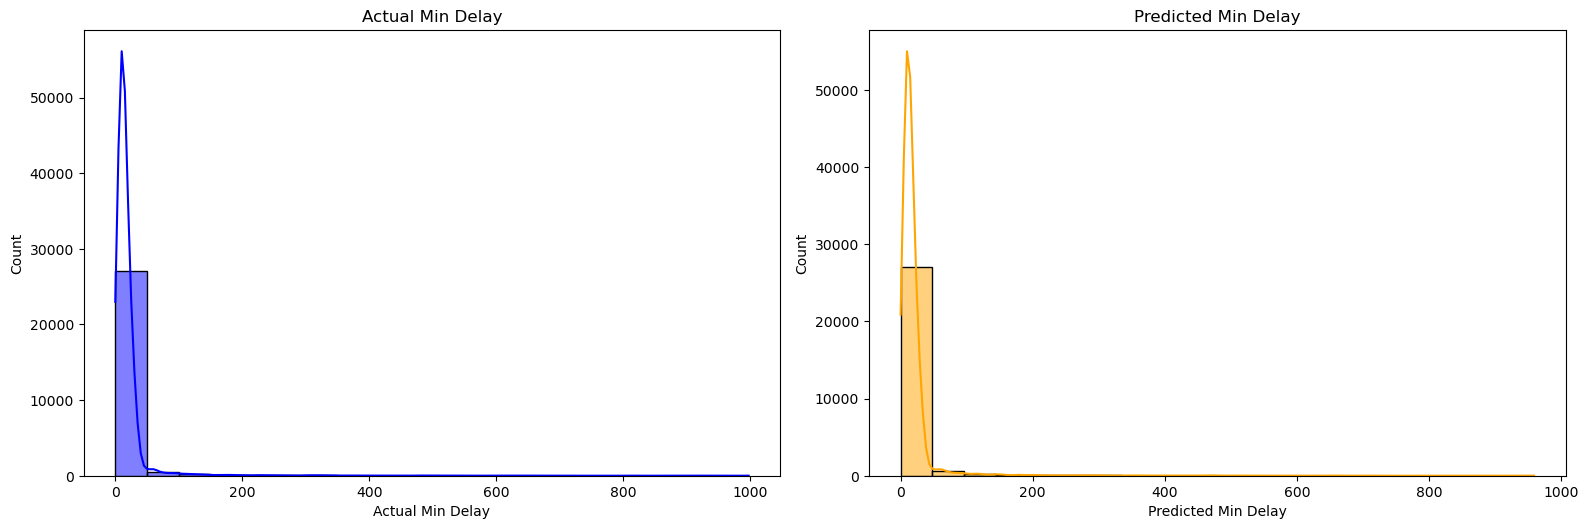

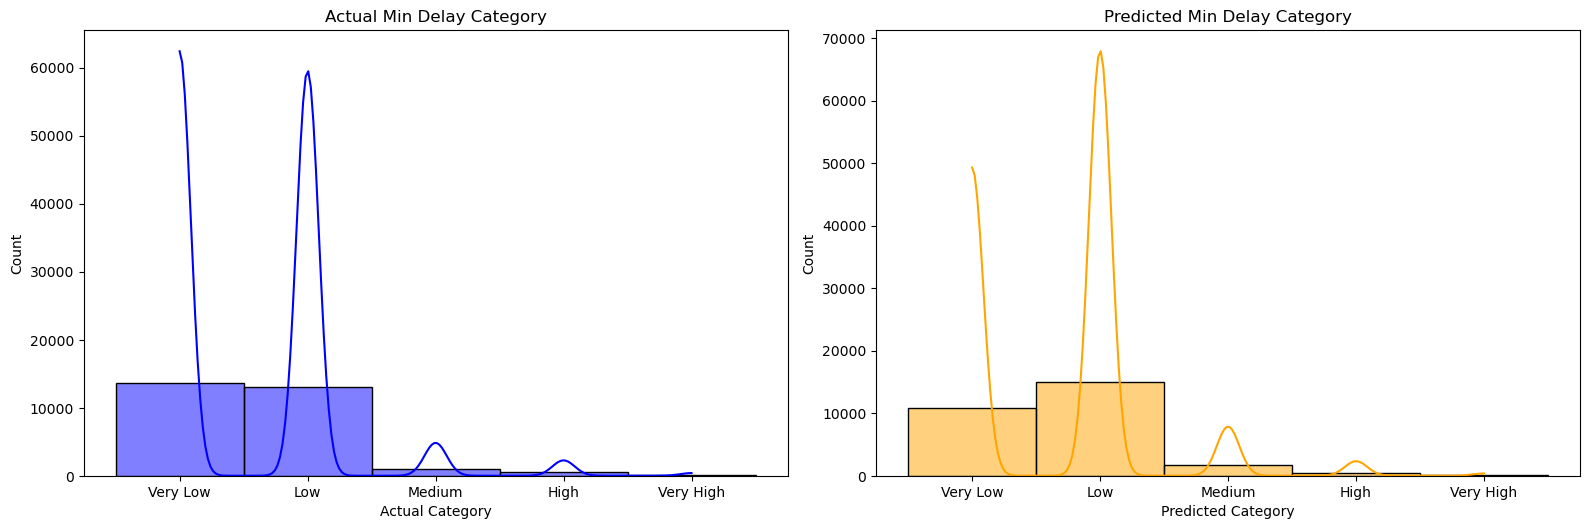

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison(actual_df, predicted_df, actual_column, predicted_column, title):
    plt.figure(figsize=(16, 10))
    
    # Actual data
    plt.subplot(2, 2, 1)
    sns.histplot(actual_df[actual_column], bins=20, kde=True, color='blue')
    plt.title(f'Actual {title}')
    plt.xlabel(actual_column)
    plt.ylabel('Count')
    
    # Predicted data
    plt.subplot(2, 2, 2)
    sns.histplot(predicted_df[predicted_column], bins=20, kde=True, color='orange')
    plt.title(f'Predicted {title}')
    plt.xlabel(predicted_column)
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Plot comparison for 'Min Delay'
plot_comparison(actual_df, predicted_df, 'Actual Min Delay', 'Predicted Min Delay', 'Min Delay')

# Plot comparison for 'Min Delay Category'
plot_comparison(actual_df, predicted_df, 'Actual Category', 'Predicted Category', 'Min Delay Category')

In [40]:
# plt.figure(figsize=(12, 8))

# # Scatter plot for Actual Min Delay
# sns.scatterplot(x='Date', y='Actual Min Delay', data=result_df, label='Actual Min Delay', color='blue', marker='o')

# # Scatter plot for Predicted Min Delay
# sns.scatterplot(x='Date', y='Predicted Min Delay', data=result_df, label='Predicted Min Delay', color='red', marker='x')

# # Set labels and title
# plt.xlabel('Date')
# plt.ylabel('Min Delay')
# plt.title('Scatter Plot of Actual and Predicted Min Delay Over Time')
# plt.legend()  # Show legend for differentiation

# # Rotate x-axis labels for better visibility
# plt.xticks(rotation=45)

# # Show the plot
# plt.show()

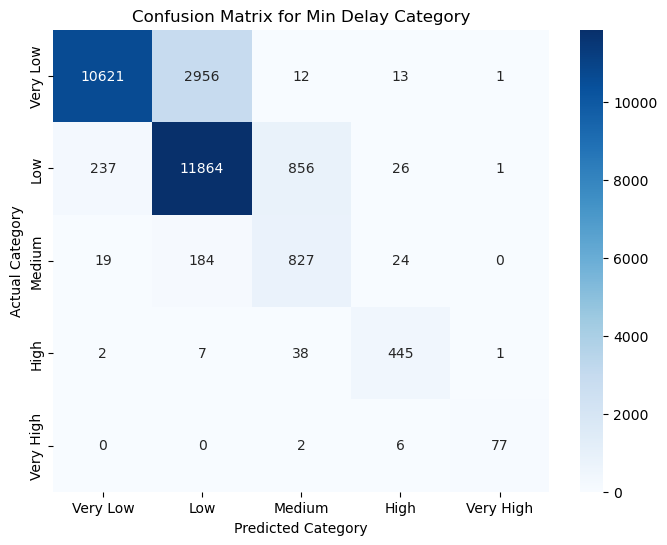

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_df['Actual Category'], predicted_df['Predicted Category'], labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Min Delay Category')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()